In [2]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d
import matplotlib as mpl
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import proj3d

import pandas as pd
import scipy as sp
import scipy.integrate
from time import time
# VCSEL Parameters
a = linewidth_enhancement_factor  = 1 # alpha
g_p = linear_birefringence_rate = 20 # rad/ns, gamma_p
g_s = spin_relaxation_rate = 10 # 1/ns, gamma_s #frequency term
g_a = gain_anisotropy = 0 # 1/ns, gamma_a # frequency term
g = electron_lifetime_frequency = 1 # gamma, 1/ns, 1/tau_n
k = half_photon_lifetime_frequency = 125 # kappa = photon_lifetime/2

# Plot the surface.
color_rcp = "#2bfef0"
color_lcp = "#952bfe"

vcsel_parameters = {
    "a": a,
    "g_p": g_p,
    "g_s": g_s,
    "g_a": g_a,
    "g": g,
    "k": k
}
## VCSEL Variations
eta = 2
P = 0
O_x = 0
O_y = 0
O_z = 0

experiment_conditions = pd.DataFrame({
    "eta" : eta,
    "P" : P,
    "O_x" : O_x,
    "O_y" : O_y,
    "O_z" : O_z
}, index=[0])

experiment_conditions.values
initial_solution= np.ones(8) * 1


In [3]:
## Fundamental Differntial Equations for Spin Flip Model
# In the the form f(t, y, *<parameters>* a, b, c) for np.solve_ivp
def spin_flip_differential_equations(t, initial_solution, vcsel_parameters, experiment_conditions):
    a = vcsel_parameters["a"]
    g_p = vcsel_parameters["g_p"]
    g_s = vcsel_parameters["g_s"]
    g_a = vcsel_parameters["g_a"]
    g = vcsel_parameters["g"]
    k= vcsel_parameters["k"]
    
    # Decompose experiment conditions
    eta = experiment_conditions["eta"]
    P = experiment_conditions["P"]
    O_x = experiment_conditions["O_x"]
    O_y = experiment_conditions["O_y"]
    O_z = experiment_conditions["O_z"]
    # Decompose solution array
    E_pr = initial_solution[0]
    E_mr = initial_solution[1]
    E_pi = initial_solution[2]
    E_mi = initial_solution[3]
    N = initial_solution[4]
    m_x = initial_solution[5]
    m_y = initial_solution[6]
    m_z = initial_solution[7]
    
    
    # Define resulting parameters
    I_p = (E_pr ** 2 + E_pi ** 2) 
    I_m = (E_mr ** 2 + E_mi ** 2)
    eta_substract = P * eta
    eta_add = eta
    
    # Array of solutions
    dS = np.zeros_like(initial_solution) # Differntial system equations
    
    ## Differential equation systems
    # Emission EM Energy Componentns
    dE_pr = k * (N + m_z - 1) * (E_pr - a * E_pi) - g_a * E_pr + g_p * E_mi - O_z * E_pi
    dE_mr = k * (N - m_z - 1) * (E_mr - a * E_mi) - g_a * E_mr + g_p * E_pi + O_z * E_mi
    dE_pi = k * (N + m_z - 1) * (E_pi + a * E_pr) - g_a * E_pi - g_p * E_mr + O_z * E_pr
    dE_mi = k * (N - m_z - 1) * (E_mi + a * E_mr) - g_a * E_mi - g_p * E_pr - O_z * E_mr
    # Electron recombination rate
    dN = g * (eta_add - (1 + I_p + I_m) * N - (I_p - I_m) * m_z)
    # Normalized electron spin magnetization
    dm_x = - (g_s + g * (I_p + I_m)) * m_x + O_y * m_z - O_z * m_y
    dm_y = - (g_s + g * (I_p + I_m)) * m_y + O_z * m_x - O_x * m_z
    dm_z = g * (eta_substract) - (g_s +
             g * (I_p + I_m)) * m_z - g * (I_p - I_m) * N + O_x * m_y - O_y * m_x
    
    # Differential compilation
    dS = np.array([dE_pr, dE_mr, dE_pi, dE_mi, dN, dm_x, dm_y, dm_z])
    return dS

# Stored variable usage
dS_columns = np.array(["dE_pr", "dE_mr", "dE_pi", "dE_mi", "dN", "dm_x", "dm_y", "dm_z"])
results_columns = dS_columns

# def simulation(sim_start_time, sim_end_time,sim_time_steps,vcsel_para, experiment_para, initial_conditions=np.ones(8)*1):
#     sim_time=np.arange(sim_start_time, sim_end_time,sim_time_steps)
#     integration_interval=[sim_start_time, sim_end_time]
    
#     simulation_results=sp.integrate.solve_ivp(spin_flip_model,
#                                              t_span=integration_interval,
#                                              y0=initial_conditions,
#                                              method='Radau',
#                                              t_eval=sim_time,
#                                              dense_output=True,
#                                              args=(vcsel_para,
#                                                   experiment_para))
#     simulation_results.y=np.vstack([simulation_results.y, return_intensity(simulation_results)])
#     return simulation_results
# def return_intensity(results):
#     [E_pr, E_nr, E_pi, E_ni, N, m_x, m_y, m_z]=results.y
#     t=results.t
    
#     E_p = np.sqrt(solution[0] ** 2 + solution[2] ** 2)
#     E_m = np.sqrt(solution[1] ** 2 + solution[3] ** 2)
    
#     I_p=(E_pr ** 2 + E_pi ** 2)
#     I_n=(E_nr ** 2 + E_pi ** 2)
#     I_tot=np.sqrt(I_p ** 2 + I_n ** 2)
#     return [I_p,I_n.I_tot]
    
    
#     return np.array([E_p, E_m, I_p, I_m, I_difference, I, E_x, E_y, I_x, I_y, e, N])

spin_flip_differential_equations(1,initial_solution,vcsel_parameters,experiment_conditions)

array([[  20.],
       [  20.],
       [ 230.],
       [-270.],
       [  -3.],
       [ -14.],
       [ -14.],
       [ -14.]])

In [4]:
def further_results(solution = np.zeros(9)):
    # Total Right Circular Emission Radiant Energy and Intensity 
    E_p = np.sqrt(solution[0] ** 2 + solution[2] ** 2)
    E_m = np.sqrt(solution[1] ** 2 + solution[3] ** 2)
    N = solution[4]
    I_p = E_p ** 2
    I_m = E_m ** 2
    # Total emission intensity
    I = (I_p + I_m)/2
    
    # Orthogonal Linear Components
    E_x = (E_p + E_m) / np.sqrt(2)
    E_y = -(E_p - E_m) / np.sqrt(2)
    I_x = E_x ** 2
    I_y = E_y ** 2
    
    # Total emission elipticity
    I_difference = (I_p - I_m)
    e =  I_difference / (I_p + I_m)
    
    return np.array([E_p, E_m, I_p, I_m, I_difference, I, E_x, E_y, I_x, I_y, e, N])

further_results_columns = np.array(["E_p", "E_m", "I_p", "I_m", "I_difference", "I", "E_x", "E_y,", "I_x", "I_y", "e", "N"])
results_columns = np.append(results_columns, further_results_columns)

In [5]:
# spin_flip_differential_equations(1)

In [6]:
results_columns

array(['dE_pr', 'dE_mr', 'dE_pi', 'dE_mi', 'dN', 'dm_x', 'dm_y', 'dm_z',
       'E_p', 'E_m', 'I_p', 'I_m', 'I_difference', 'I', 'E_x', 'E_y,',
       'I_x', 'I_y', 'e', 'N'], dtype='<U12')

In [7]:
def plot_results(simulation_time, solution, detailed_solution):
    #  +, - Components
    plt.figure()
    plt.plot(simulation_time, solution[0], label="E_pr")
    plt.plot(simulation_time, solution[1], label="E_mr")
    plt.legend()
    
    # I_n, I_p
    plt.figure()
    plt.plot(simulation_time, detailed_solution[2], label="I_p")
    plt.plot(simulation_time, detailed_solution[3], label="I_n")
    plt.ylim((0,1))
    plt.legend()
    
    # X-Y Components
    plt.figure()
    plt.plot(simulation_time, detailed_solution[6], label="E_x")
    plt.plot(simulation_time, detailed_solution[7], label="E_y")
    plt.legend()
    
    # Elipticity
    plt.figure()
    plt.plot(simulation_time, detailed_solution[8], label= "Elipticity Eta")
    plt.legend()

In [8]:
g_p/(2 * np.pi)
# plot_results

3.183098861837907

In [9]:
def travagnin_spin_flip_differential_equations(t, 
                                      initial_solution=np.zeros(8), 
                                      vcsel_parameters=np.zeros(6),
                                      experiment_conditions=np.zeros(5)
                                    ):

    dI = 2 * I (k * (N - 1) - g_a * np.cos(2 * W) * np.cos(2 * X) + k * m_z * np.sin(2 * X))
    dTheta = -k * a * (N - 1) - g_a * np.sin(2 * W) * np.tan(2 * X) + g_p * np.cos(2 * W) / np.cos(2 * X)
    dX = k * m_z * np.cos(2 * X) + g_a * np.cos(2 * W) * np.sin(2 * X) + g_p * np.cos(2 * W) * np.tan(2 * X)
    dW = -O_z - k * a * m_z + g_a * np.sin(2 * W) / np.cos(2 * X) - g_p * np.cos(2 * W) * np.tan(2 * X)
    dN = g * (eta - (1 + 2 * I) * N -  2 * I * np.sin(2 * X) * m_z) 
    dm_z = g * P * eta - (g_s + 2 * g * I) * m_z - 2 * g * I * np.sin(2 * X) * N
    
    # Differential compilation
    dS = np.array([dE_pr, dE_mr, dE_pi, dE_mi, dN, dm_x, dm_y, dm_z])
    return dS

In [10]:
## VCSEL Variations
eta = 2
P = 0
O_x = 0
O_y = 0
O_z = 0

experiment_conditions = pd.DataFrame({
    "eta" : eta,
    "P" : P,
    "O_x" : O_x,
    "O_y" : O_y,
    "O_z" : O_z
}, index=[0])



In [11]:
def vcsel_experimental_modelling(vcsel_parameters,
                                 experiment_conditions, initial_solution= np.ones(8) * 1):
    
    # Set up simulation time
    min_simulation_time = 0
    max_simulation_time = 35
    simultion_time_steps= 5
    simulation_time = np.arange(min_simulation_time, max_simulation_time, simultion_time_steps)
    integration_interval = [min_simulation_time, max_simulation_time]

    
    # Integration solver
    sim_results = sp.integrate.solve_ivp(spin_flip_differential_equations,
                                    integration_interval,
                                    initial_solution,
                                    method='Radau',
                                    t_eval=simulation_time,
                                    dense_output=True,
                                    args=(vcsel_parameters,
                                          experiment_conditions))
    
    
    # Selected solution range
    solution = sim_results.sol(simulation_time)
    detailed_solution = further_results(solution)
    simulation_data = np.concatenate((solution, detailed_solution), 0)
    
    
    # Get derived parameters
    experiment_conditions_dataframe = pd.DataFrame(experiment_conditions,
                                                   index=[0])
    vcsel_parameters_dataframe = pd.DataFrame(vcsel_parameters,
                                                   index=[0])
    repeated_experiment_conditions = pd.concat(
        [experiment_conditions_dataframe]*simulation_time.size, ignore_index=True)
    repeated_vcsel_parameters = pd.concat(
        [vcsel_parameters_dataframe]*simulation_time.size, ignore_index=True)
    
    # Simulation dataframe
    simulation_dataframe = pd.DataFrame(simulation_data.T,
                                        columns = results_columns)
    simulation_dataframe["simulation_time"] = simulation_time
    
    for experimental_parameter in repeated_experiment_conditions.keys():
        simulation_dataframe[
            experimental_parameter] =  repeated_experiment_conditions[
                                            experimental_parameter]
        
    for vcsel_parameter in repeated_vcsel_parameters.keys():
        simulation_dataframe[
            vcsel_parameter] =  repeated_vcsel_parameters[
                                    vcsel_parameter]
        
    return simulation_dataframe

In [12]:

# vcsel_experimental_modelling(vcsel_parameters, experiment_conditions, initial_solution= np.ones(8) * 1)

In [13]:
# a = linewidth_enhancement_factor  = 2 # alpha
# g_p = linear_birefringence_rate = 5 # rad/ns, gamma_p
# g_s = spin_relaxation_rate = 105 # 1/ns, gamma_s #frequency term
# g_a = gain_anisotropy = 0 # 1/ns, gamma_a # frequency term
# g = electron_lifetime_frequency = 1 # gamma, 1/ns, 1/tau_n
# k = half_photon_lifetime_frequency = 250 # kappa = photon_lifetime/2
# initial_time = int(time())

# # Varing VCSEL parameters
# VCSEL_variations_DataFrame = pd.DataFrame()
# for g_s_i in np.linspace(0, 1000, 100):
#     # print("g_p_i: " + str(g_p_i))
#     # print("time: " + str(int(time()-initial_time)))
#     vcsel_parameters = {
#         "a": a,
#         "g_p": g_p,
#         "g_s": g_s_i,
#         "g_a": g_a,
#         "g": g,
#         "k": k
#     }
#     experiment_conditions = {
#         "eta" : 2,
#         "P" : 0,
#         "O_x" : 0,
#         "O_y" : 0,
#         "O_z" : 0
#     }

#     iteration_dataframe = vcsel_experimental_modelling(vcsel_parameters, experiment_conditions)
#     VCSEL_variations_DataFrame = VCSEL_variations_DataFrame.append(iteration_dataframe, ignore_index=True)

# VCSEL_variations_DataFrame.to_csv(
#     "simulation_results/spin_relaxation_rate_variations_" 
#      + str(int(time())) 
#      + ".csv")


# dataframe_selection.columns


In [14]:
#Varying Linewidth Enhancement Factor $\alpha$
a = linewidth_enhancement_factor  = 1 # alpha
g_p = linear_birefringence_rate = 20 # rad/ns, gamma_p
g_s = spin_relaxation_rate = 10 # 1/ns, gamma_s #frequency term
g_a = gain_anisotropy = 0 # 1/ns, gamma_a # frequency term
g = electron_lifetime_frequency = 1 # gamma, 1/ns, 1/tau_n
k = half_photon_lifetime_frequency = 125 # kappa = photon_lifetime/2
initial_time = int(time())

# Varing VCSEL parameters
VCSEL_variations_DataFrame = pd.DataFrame()
for a_i in np.linspace(0, 8, 50):
    # print("g_p_i: " + str(g_p_i))
    # print("time: " + str(int(time()-initial_time)))
    vcsel_parameters = {
        "a": a_i,
        "g_p": g_p,
        "g_s": g_s,
        "g_a": g_a,
        "g": g,
        "k": k
    }
    experiment_conditions = {
        "eta" : 2,
        "P" : 0,
        "O_x" : 0,
        "O_y" : 0,
        "O_z" : 0
    }

    iteration_dataframe = vcsel_experimental_modelling(vcsel_parameters, experiment_conditions)
    VCSEL_variations_DataFrame = VCSEL_variations_DataFrame.append(iteration_dataframe, ignore_index=True)

VCSEL_variations_DataFrame.to_csv(
    "simulation_results/linewidth_enhancement_factor_variations_" 
     + str(int(time())) 
     + ".csv")

In [ ]:
linewidth_enhancement_factor_variations_dataframe = pd.read_csv("simulation_results/linewidth_enhancement_factor_variations_1589052786.csv")
linewidth_enhancement_factor_variations_dataframe

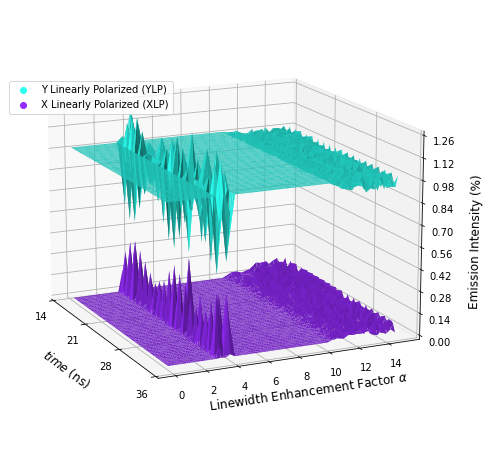

In [33]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection = '3d')

dataframe_selection = linewidth_enhancement_factor_variations_dataframe[(linewidth_enhancement_factor_variations_dataframe.simulation_time > 15) &
                                                             (linewidth_enhancement_factor_variations_dataframe.index % 10 == 0)]
# Make data.
X = dataframe_selection.simulation_time
Y = dataframe_selection.a
Z_1 = dataframe_selection.I_x # X-Component
Z_2 = dataframe_selection.I_y # Y-Component

# Plot the surface.
color_rcp = "#2bfef0"
color_lcp = "#952bfe"
# ax.plot_trisurf(X, Y, Z_1, edgecolor='none', label=r'$I_{RCP}$');
# ax.plot_trisurf(X, Y, Z_2, edgecolor='none', label=r'$I_{LCP}$');
ax.plot_trisurf(X, Y, Z_1, color=color_rcp, alpha=1, edgecolor='none', label=r'$I_{RCP}$');
ax.plot_trisurf(X, Y, Z_2, color=color_lcp, alpha=1, edgecolor='none', label=r'$I_{LCP}$');

# Customize the axes
ax.xaxis.set_major_locator(LinearLocator(4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.f'))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# ax.set_title(r'Linear emission polarization - $\alpha$ variations', fontweight="bold", fontsize=16)
ax.set_xlabel(r'$time$ (ns)', fontsize =12)#, fontweight="bold")
ax.set_ylabel(r' Linewidth Enhancement Factor $\alpha$', fontsize =12)#, fontweight="bold")
ax.set_zlabel(r'Emission Intensity (%)', fontsize =12)#, fontweight="bold")

# Pad Axes Labels
ax.xaxis.labelpad=10
ax.yaxis.labelpad=5
ax.zaxis.labelpad=10

# ax.view_init(elev=0., azim=-210)
ax.view_init(elev=15., azim=-25)
rcp_surface_buffer_2d_line = mpl.lines.Line2D([0],[0], linestyle="none", c=color_rcp, marker = 'o')
lcp_surface_buffer_2d_line = mpl.lines.Line2D([0],[0], linestyle="none", c=color_lcp, marker = 'o')
f = lambda x,y,z: proj3d.proj_transform(x,y,z, ax.get_proj())[:2]
ax.legend([rcp_surface_buffer_2d_line, lcp_surface_buffer_2d_line],
          ['Y Linearly Polarized (YLP)', 'X Linearly Polarized (XLP)'],
          numpoints = 1,
          loc="lower left",
          bbox_to_anchor=f(0,-0.3,0.95), 
          bbox_transform=ax.transData)

plt.savefig("graph/linewidth_enhancement_factor_variations_" 
             + str(int(time())) 
             + ".png", bbox_inches="tight")

In [17]:

#Varying Photon Lifetime Frequency $K$¶

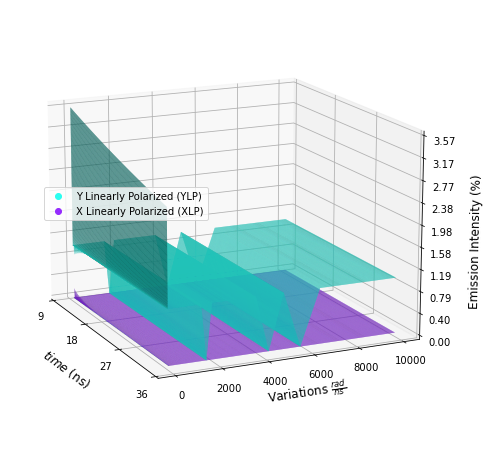

In [42]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection = '3d')
half_photon_lifetime_frequency_variations = pd.read_csv("simulation_results/half_photon_lifetime_frequency_variations_1588206418.csv")
half_photon_lifetime_frequency_variations
dataframe_selection = half_photon_lifetime_frequency_variations[(half_photon_lifetime_frequency_variations.simulation_time > 10) &
                                                               (half_photon_lifetime_frequency_variations.a > 1)]
# Make data.
X = dataframe_selection.simulation_time
Y = dataframe_selection.k # z axial field component
Z_1 = dataframe_selection.I_x # X-Component
Z_2 = dataframe_selection.I_y # Y-Component

# Plot the surface.
color_rcp = "#2bfef0"
color_lcp = "#952bfe"
# ax.plot_trisurf(X, Y, Z_1, edgecolor='none', label=r'$I_{RCP}$');
# ax.plot_trisurf(X, Y, Z_2, edgecolor='none', label=r'$I_{LCP}$');
ax.plot_trisurf(X, Y, Z_1, color=color_rcp, alpha=1, edgecolor='none', label=r'$I_{RCP}$');
ax.plot_trisurf(X, Y, Z_2, color=color_lcp, alpha=1, edgecolor='none', label=r'$I_{LCP}$');

# Customize the axes
ax.xaxis.set_major_locator(LinearLocator(4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.f'))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# ax.set_title(r'Linear emission polarization - $\kappa$ variations', fontweight="bold", fontsize=16)
ax.set_xlabel(r'$time$ (ns)', fontsize =12)#, fontweight="bold")
ax.set_ylabel(r'Variations $\frac{rad}{ns}$', fontsize =12)#, fontweight="bold") # TODO more applicable definition
ax.set_zlabel(r'Emission Intensity (%)', fontsize =12)#, fontweight="bold")

# Pad Axes Labels
ax.xaxis.labelpad=10
ax.yaxis.labelpad=5
ax.zaxis.labelpad=10

# ax.view_init(elev=0., azim=-210)
ax.view_init(elev=15., azim=-25)
rcp_surface_buffer_2d_line = mpl.lines.Line2D([0],[0], linestyle="none", c=color_rcp, marker = 'o')
lcp_surface_buffer_2d_line = mpl.lines.Line2D([0],[0], linestyle="none", c=color_lcp, marker = 'o')
f = lambda x,y,z: proj3d.proj_transform(x,y,z, ax.get_proj())[:2]
ax.legend([rcp_surface_buffer_2d_line, lcp_surface_buffer_2d_line],
          ['Y Linearly Polarized (YLP)', 'X Linearly Polarized (XLP)', ],
          numpoints = 1,
          loc="lower left",
          bbox_to_anchor=f(0,-0.3,0.95), 
          bbox_transform=ax.transData)

# plt.savefig("graphs/half_photon_lifetime_frequency_variations_" 
#              + str(int(time())) 
#              + ".png", bbox_inches="tight")


In [ ]:
### Varying Linear Birefringence Rate $\gamma_p$
a = linewidth_enhancement_factor  = 5 # alpha
g_p = linear_birefringence_rate = 34.5 # rad/ns, gamma_p
g_s = spin_relaxation_rate = 105 # 1/ns, gamma_s #frequency term
g_a = gain_anisotropy = 0 # 1/ns, gamma_a # frequency term
g = electron_lifetime_frequency = 1 # gamma, 1/ns, 1/tau_n
k = half_photon_lifetime_frequency = 250 # kappa = photon_lifetime/2
initial_time = int(time())

# Varing VCSEL parameters
VCSEL_variations_DataFrame = pd.DataFrame()
for g_p_i in np.linspace(0, 10, 100):
    vcsel_parameters = {
        "a": a,
        "g_p": g_p_i,
        "g_s": g_s,
        "g_a": g_a,
        "g": g,
        "k": k
    }
    experiment_conditions = {
        "eta" : 2,
        "P" : 0,
        "O_x" : 0,
        "O_y" : 0,
        "O_z" : 0
    }

    iteration_dataframe = vcsel_experimental_modelling(vcsel_parameters, experiment_conditions)
    VCSEL_variations_DataFrame = VCSEL_variations_DataFrame.append(iteration_dataframe, ignore_index=True)

VCSEL_variations_DataFrame.to_csv(
    "simulation_results/linear_birefringence_rate_variations_" 
     + str(int(time())) 
     + ".csv")

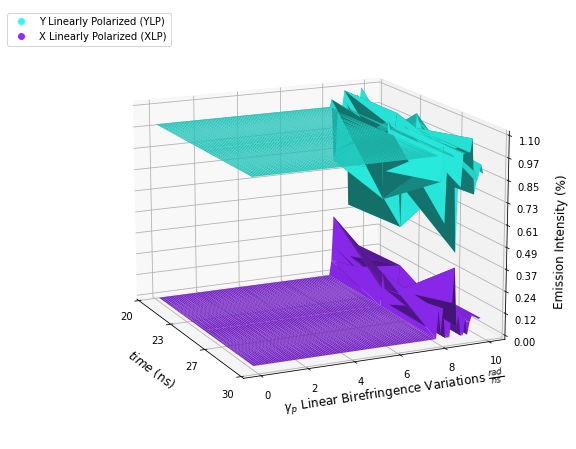

In [36]:
linear_birefringence_variations_dataframe = pd.read_csv("simulation_results/linear_birefringence_rate_variations_1621435012.csv")
linear_birefringence_variations_dataframe
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection = '3d')

dataframe_selection = linear_birefringence_variations_dataframe[(linear_birefringence_variations_dataframe.simulation_time > 15)]
# Make data.
X = dataframe_selection.simulation_time
Y = dataframe_selection.g_p # z axial field component
Z_1 = dataframe_selection.I_x # X-Component
Z_2 = dataframe_selection.I_y # Y-Component

# Plot the surface.
color_rcp = "#2bfef0"
color_lcp = "#952bfe"
# ax.plot_trisurf(X, Y, Z_1, edgecolor='none', label=r'$I_{RCP}$');
# ax.plot_trisurf(X, Y, Z_2, edgecolor='none', label=r'$I_{LCP}$');
ax.plot_trisurf(X, Y, Z_1, color=color_rcp, alpha=1, edgecolor='none', label=r'$I_{RCP}$');
ax.plot_trisurf(X, Y, Z_2, color=color_lcp, alpha=1, edgecolor='none', label=r'$I_{LCP}$');

# Customize the axes
ax.xaxis.set_major_locator(LinearLocator(4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.f'))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# ax.set_title(r'Linear emission polarization - $\gamma_p$ variations', fontweight="bold", fontsize=16)
ax.set_xlabel(r'$time$ (ns)', fontsize =12)#, fontweight="bold")
ax.set_ylabel(r' $\gamma_p$ Linear Birefringence Variations $\frac{rad}{ns}$', fontsize =12)#, fontweight="bold") # TODO more applicable definition
ax.set_zlabel(r'Emission Intensity (%)', fontsize =12)#, fontweight="bold")

# Pad Axes Labels
ax.xaxis.labelpad=10
ax.yaxis.labelpad=5
ax.zaxis.labelpad=10

# ax.view_init(elev=0., azim=-210)
ax.view_init(elev=15., azim=-25)
rcp_surface_buffer_2d_line = mpl.lines.Line2D([0],[0], linestyle="none", c=color_rcp, marker = 'o')
lcp_surface_buffer_2d_line = mpl.lines.Line2D([0],[0], linestyle="none", c=color_lcp, marker = 'o')
f = lambda x,y,z: proj3d.proj_transform(x,y,z, ax.get_proj())[:2]
ax.legend([rcp_surface_buffer_2d_line, lcp_surface_buffer_2d_line],
          [ 'Y Linearly Polarized (YLP)', 'X Linearly Polarized (XLP)'],
          numpoints = 1,
          loc="lower left",
          bbox_to_anchor=f(0,-0.3,0.95), 
          bbox_transform=ax.transData)



In [ ]:
# Varying Gain Anisotropy (Dichroism)  𝛾𝑎
# Varing VCSEL parameters
VCSEL_variations_DataFrame = pd.DataFrame()
for g_a_i in np.linspace(0, 60, 100):
    vcsel_parameters = {
        "a": a,
        "g_p": g_p,
        "g_s": g_s,
        "g_a": g_a_i,
        "g": g,
        "k": k
    }
    experiment_conditions = {
        "eta" : 2,
        "P" : 0,
        "O_x" : 0,
        "O_y" : 0,
        "O_z" : 0
    }

    iteration_dataframe = vcsel_experimental_modelling(vcsel_parameters, experiment_conditions)
    VCSEL_variations_DataFrame = VCSEL_variations_DataFrame.append(iteration_dataframe, ignore_index=True)

VCSEL_variations_DataFrame.to_csv(
    "simulation_results/gain_anisotropy_variations_" 
     + str(int(time())) 
     + ".csv")

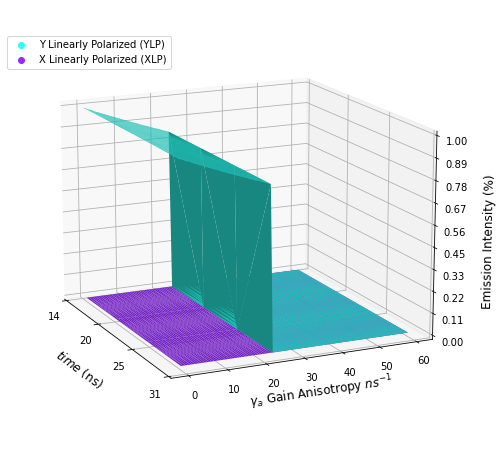

In [38]:
gain_anisotropy_variations_dataframe = pd.read_csv("simulation_results/gain_anisotropy_variations_1621435614.csv")
gain_anisotropy_variations_dataframe
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection = '3d')

dataframe_selection = gain_anisotropy_variations_dataframe[gain_anisotropy_variations_dataframe.simulation_time > 10]
# Make data.
X = dataframe_selection.simulation_time
Y = dataframe_selection.g_a # z axial field component
Z_1 = dataframe_selection.I_x # X-Component
Z_2 = dataframe_selection.I_y # Y-Component
# ax.plot_trisurf(X, Y, Z_1, edgecolor='none', label=r'$I_{RCP}$');
# ax.plot_trisurf(X, Y, Z_2, edgecolor='none', label=r'$I_{LCP}$');
ax.plot_trisurf(X, Y, Z_1, color=color_rcp, alpha=1, edgecolor='none', label=r'$I_{RCP}$');
ax.plot_trisurf(X, Y, Z_2, color=color_lcp, alpha=1, edgecolor='none', label=r'$I_{LCP}$');

# Customize the axes
ax.xaxis.set_major_locator(LinearLocator(4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.f'))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# ax.set_title(r'Linear emission polarization - $\gamma_a$ variations', fontweight="bold", fontsize=16)
ax.set_xlabel(r'$time$ (ns)', fontsize =12)#, fontweight="bold")
ax.set_ylabel(r' $\gamma_a$ Gain Anisotropy $ns^{-1}$', fontsize =12)#, fontweight="bold") # TODO more applicable definition
ax.set_zlabel(r'Emission Intensity (%)', fontsize =12)#, fontweight="bold")

# Pad Axes Labels
ax.xaxis.labelpad=10
ax.yaxis.labelpad=5
ax.zaxis.labelpad=10

# ax.view_init(elev=0., azim=-210)
ax.view_init(elev=15., azim=-25)
rcp_surface_buffer_2d_line = mpl.lines.Line2D([0],[0], linestyle="none", c=color_rcp, marker = 'o')
lcp_surface_buffer_2d_line = mpl.lines.Line2D([0],[0], linestyle="none", c=color_lcp, marker = 'o')
f = lambda x,y,z: proj3d.proj_transform(x,y,z, ax.get_proj())[:2]
ax.legend([rcp_surface_buffer_2d_line, lcp_surface_buffer_2d_line],
          ['Y Linearly Polarized (YLP)','X Linearly Polarized (XLP)'],
          numpoints = 1,
          loc="lower left",
          bbox_to_anchor=f(0,-0.3,0.95), 
          bbox_transform=ax.transData)

In [ ]:
###################################################################################################
# Varying Spin Relaxation Rate  𝛾𝑠

# Varing VCSEL parameters
spin_relaxation_rate_variations_dataframe = pd.DataFrame()
for g_s_i in np.linspace(90, 100, 50):
    vcsel_parameters = {
        "a": a,
        "g_p": g_p,
        "g_s": g_s_i,
        "g_a": g_a,
        "g": g,
        "k": k
    }
    experiment_conditions = {
        "eta" : 2,
        "P" : 0,
        "O_x" : 0,
        "O_y" : 0,
        "O_z" : 0
    }

    iteration_dataframe = vcsel_experimental_modelling(vcsel_parameters, experiment_conditions)
    spin_relaxation_rate_variations_dataframe = spin_relaxation_rate_variations_dataframe.append(iteration_dataframe, ignore_index=True)

spin_relaxation_rate_variations_dataframe.to_csv(
    "simulation_results/spin_relaxation_rate_variations_" 
     + str(int(time())) 
     + ".csv")

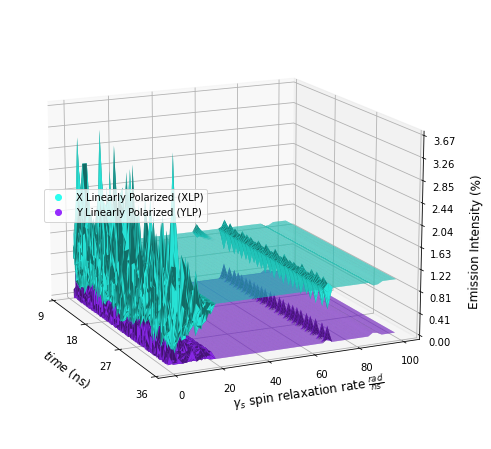

In [43]:
spin_relaxation_rate_variations_dataframe = pd.read_csv("simulation_results/spin_relaxation_rate_variations_1590484216.csv")
spin_relaxation_rate_variations_dataframe
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection = '3d')

dataframe_selection = spin_relaxation_rate_variations_dataframe[spin_relaxation_rate_variations_dataframe.simulation_time > 10]
# Make data.
X = dataframe_selection.simulation_time
Y = dataframe_selection.g_s # z axial field component
Z_1 = dataframe_selection.I_x # X-Component
Z_2 = dataframe_selection.I_y # Y-Component

# ax.plot_trisurf(X, Y, Z_1, edgecolor='none', label=r'$I_{RCP}$');
# ax.plot_trisurf(X, Y, Z_2, edgecolor='none', label=r'$I_{LCP}$');
ax.plot_trisurf(X, Y, Z_1, color=color_rcp, alpha=1, edgecolor='none', label=r'$I_{RCP}$');
ax.plot_trisurf(X, Y, Z_2, color=color_lcp, alpha=1, edgecolor='none', label=r'$I_{LCP}$');

# Customize the axes
ax.xaxis.set_major_locator(LinearLocator(4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.f'))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# ax.set_title(r'Linear emission magneto-polarization - $\gamma_p$ variations', fontweight="bold", fontsize=16)
ax.set_xlabel(r'$time$ (ns)', fontsize =12)#, fontweight="bold")
ax.set_ylabel(r' $\gamma_s$ spin relaxation rate $\frac{rad}{ns}$', fontsize =12)#, fontweight="bold") # TODO more applicable definition
ax.set_zlabel(r'Emission Intensity (%)', fontsize =12)#, fontweight="bold")

# Pad Axes Labels
ax.xaxis.labelpad=10
ax.yaxis.labelpad=5
ax.zaxis.labelpad=10

# ax.view_init(elev=0., azim=-210)
ax.view_init(elev=15., azim=-25)
rcp_surface_buffer_2d_line = mpl.lines.Line2D([0],[0], linestyle="none", c=color_rcp, marker = 'o')
lcp_surface_buffer_2d_line = mpl.lines.Line2D([0],[0], linestyle="none", c=color_lcp, marker = 'o')
f = lambda x,y,z: proj3d.proj_transform(x,y,z, ax.get_proj())[:2]
ax.legend([rcp_surface_buffer_2d_line, lcp_surface_buffer_2d_line],
          ['X Linearly Polarized (XLP)', 'Y Linearly Polarized (YLP)'],
          numpoints = 1,
          loc="lower left",
          bbox_to_anchor=f(0,-0.3,0.95), 
          bbox_transform=ax.transData)

In [28]:
###################################################################################################
#Varying Electron Lifetime Frequency  𝛾
electron_lifetime_frequency_rate_variations_dataframe = pd.DataFrame()
for g_i in np.linspace(0.9, 1.1, 50):
    vcsel_parameters = {
        "a": a,
        "g_p": g_p,
        "g_s": g_i,
        "g_a": g_a,
        "g": g,
        "k": k
    }
    experiment_conditions = {
        "eta" : 2,
        "P" : 0,
        "O_x" : 0,
        "O_y" : 0,
        "O_z" : 0
    }

    iteration_dataframe = vcsel_experimental_modelling(vcsel_parameters, experiment_conditions)
    electron_lifetime_frequency_rate_variations_dataframe = electron_lifetime_frequency_rate_variations_dataframe.append(iteration_dataframe, ignore_index=True)

electron_lifetime_frequency_rate_variations_dataframe.to_csv(
    "simulation_results/electron_lifetime_frequency_rate_variations_" 
     + str(int(time())) 
     + ".csv")

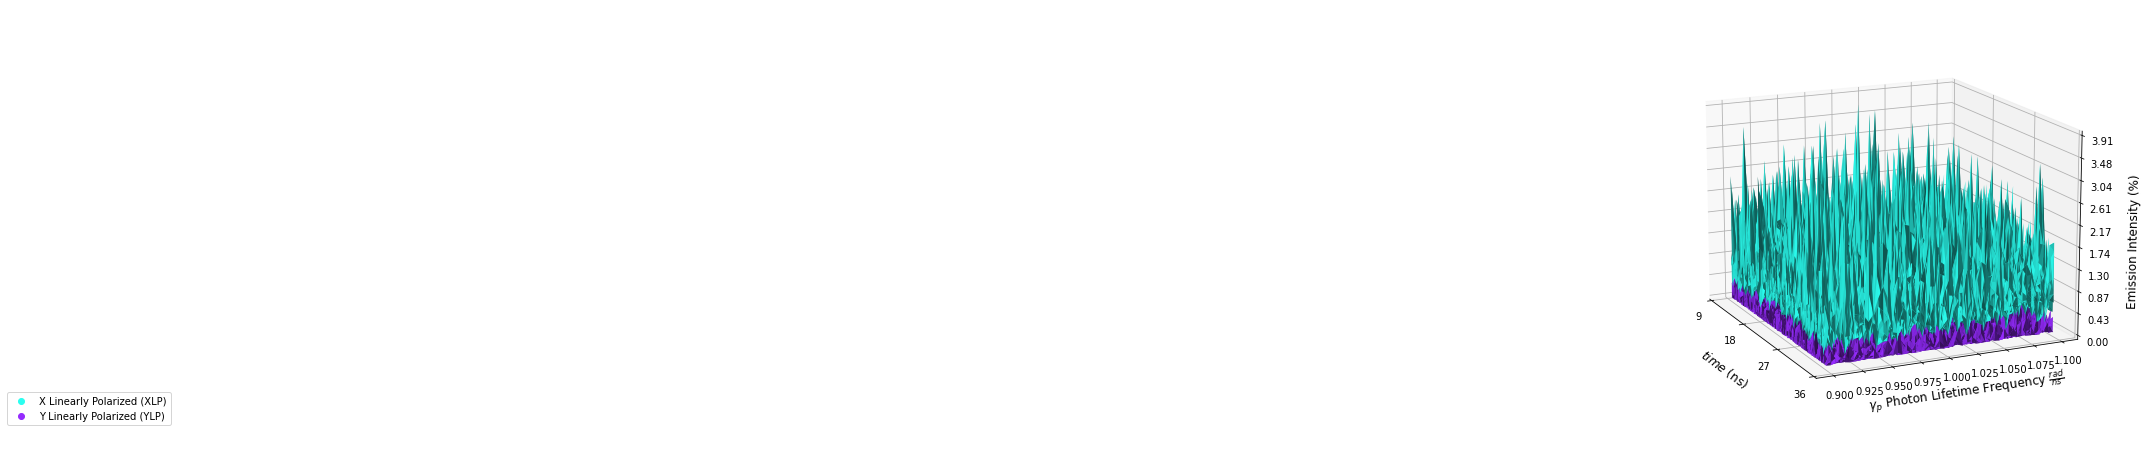

In [41]:
electron_lifetime_frequency_rate_variations_dataframe = pd.read_csv("simulation_results/electron_lifetime_frequency_rate_variations_1589222357.csv")
electron_lifetime_frequency_rate_variations_dataframe
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection = '3d')

dataframe_selection = electron_lifetime_frequency_rate_variations_dataframe[electron_lifetime_frequency_rate_variations_dataframe.simulation_time > 10]
# Make data.
X = dataframe_selection.simulation_time
Y = dataframe_selection.g_s # z axial field component
Z_1 = dataframe_selection.I_x # X-Component
Z_2 = dataframe_selection.I_y # Y-Component

# ax.plot_trisurf(X, Y, Z_1, edgecolor='none', label=r'$I_{RCP}$');
# ax.plot_trisurf(X, Y, Z_2, edgecolor='none', label=r'$I_{LCP}$');
ax.plot_trisurf(X, Y, Z_1, color=color_rcp, alpha=1, edgecolor='none', label=r'$I_{RCP}$');
ax.plot_trisurf(X, Y, Z_2, color=color_lcp, alpha=1, edgecolor='none', label=r'$I_{LCP}$');

# Customize the axes
ax.xaxis.set_major_locator(LinearLocator(4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.f'))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# ax.set_title(r'Linear emission magneto-polarization - $\gamma$ variations', fontweight="bold", fontsize=16)
ax.set_xlabel(r'$time$ (ns)', fontsize =12)#, fontweight="bold")
ax.set_ylabel(r' $\gamma_p$ Photon Lifetime Frequency $\frac{rad}{ns}$', fontsize =12)#, fontweight="bold") # TODO more applicable definition
ax.set_zlabel(r'Emission Intensity (%)', fontsize =12)#, fontweight="bold")

# Pad Axes Labels
ax.xaxis.labelpad=10
ax.yaxis.labelpad=5
ax.zaxis.labelpad=10

# ax.view_init(elev=0., azim=-210)
ax.view_init(elev=15., azim=-25)
rcp_surface_buffer_2d_line = mpl.lines.Line2D([0],[0], linestyle="none", c=color_rcp, marker = 'o')
lcp_surface_buffer_2d_line = mpl.lines.Line2D([0],[0], linestyle="none", c=color_lcp, marker = 'o')
f = lambda x,y,z: proj3d.proj_transform(x,y,z, ax.get_proj())[:2]
ax.legend([rcp_surface_buffer_2d_line, lcp_surface_buffer_2d_line],
          ['X Linearly Polarized (XLP)', 'Y Linearly Polarized (YLP)'],
          numpoints = 1,
          loc="lower left",
          bbox_to_anchor=f(0,-0.3,0.95), 
          bbox_transform=ax.transData)

plt.savefig("electron_lifetime_frequency_rate_variations_" 
             + str(int(time())) 
             + ".png", bbox_inches="tight")

In [30]:
#################################################
#Varying Pump Elipticity
# Varing VCSEL parameters
pump_elipticity_variations_dataframe = pd.DataFrame()
for eta_i in np.linspace(0, 10, 50):
    # print("g_p_i: " + str(g_p_i))
    # print("time: " + str(int(time()-initial_time)))
    vcsel_parameters = {
        "a": a,
        "g_p": g_p,
        "g_s": g_s,
        "g_a": g_a,
        "g": g,
        "k": k
    }
    experiment_conditions = {
        "eta" : 1,
        "P" : eta_i,
        "O_x" : 0,
        "O_y" : 0,
        "O_z" : 0
    }

    iteration_dataframe = vcsel_experimental_modelling(vcsel_parameters, experiment_conditions)
    pump_elipticity_variations_dataframe = pump_elipticity_variations_dataframe.append(iteration_dataframe, ignore_index=True)

pump_elipticity_variations_dataframe.to_csv(
    "simulation_results/pump_elipticity_variations_" 
     + str(int(time())) 
     + ".csv")


In [31]:
pump_elipticity_variations_dataframe = pd.read_csv("simulation_results/pump_elipticity_variations_1589298049.csv)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection = '3d')

dataframe_selection = pump_elipticity_variations_dataframe[(pump_elipticity_variations_dataframe.simulation_time > 10) &
                                                          (pump_elipticity_variations_dataframe.index % 10 == 0)]
# Make data.
X = dataframe_selection.simulation_time
Y = dataframe_selection.g_s # z axial field component
Z_1 = dataframe_selection.I_x # X-Component
Z_2 = dataframe_selection.I_y # Y-Component

# ax.plot_trisurf(X, Y, Z_1, edgecolor='none', label=r'$I_{RCP}$');
# ax.plot_trisurf(X, Y, Z_2, edgecolor='none', label=r'$I_{LCP}$');
ax.plot_trisurf(X, Y, Z_1, color=color_rcp, alpha=1, edgecolor='none', label=r'$I_{RCP}$');
ax.plot_trisurf(X, Y, Z_2, color=color_lcp, alpha=1, edgecolor='none', label=r'$I_{LCP}$');

# Customize the axes
ax.xaxis.set_major_locator(LinearLocator(4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.f'))
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_title(r'Linear emission magneto-polarization - $\gamma_p$ variations', fontweight="bold", fontsize=16)
ax.set_xlabel(r'$time$ (ns)', fontsize =12)#, fontweight="bold")
ax.set_ylabel(r' $\gamma_p$ Photon Lifetime Frequency $\frac{rad}{ns}$', fontsize =12)#, fontweight="bold") # TODO more applicable definition
ax.set_zlabel(r'Emission Intensity (%)', fontsize =12)#, fontweight="bold")

# Pad Axes Labels
ax.xaxis.labelpad=10
ax.yaxis.labelpad=5
ax.zaxis.labelpad=10

# ax.view_init(elev=0., azim=-210)
ax.view_init(elev=15., azim=-25)
rcp_surface_buffer_2d_line = mpl.lines.Line2D([0],[0], linestyle="none", c=color_rcp, marker = 'o')
lcp_surface_buffer_2d_line = mpl.lines.Line2D([0],[0], linestyle="none", c=color_lcp, marker = 'o')
f = lambda x,y,z: proj3d.proj_transform(x,y,z, ax.get_proj())[:2]
ax.legend([rcp_surface_buffer_2d_line, lcp_surface_buffer_2d_line],
          ['X Linearly Polarized (XLP)', 'Y Linearly Polarized (YLP)'],
          numpoints = 1,
          loc="lower left",
          bbox_to_anchor=f(0,-0.3,0.95), 
          bbox_transform=ax.transData)

SyntaxError: EOL while scanning string literal (<ipython-input-31-f85a775e27a2>, line 1)

In [ ]:
plt.plot(pump_elipticity_variations_dataframe.simulation_time, pump_elipticity_variations_dataframe.P)